# Análise exploratória de dados

## 1. Descrição dos dados

### 1.1 Configurações iniciais

In [1]:
#Importações de bibliotecas
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display, HTML
import numpy as np

from src.data import visualize, prepare

In [2]:
colors = ["#20B2AA", "#B22028"]
sns.set_theme(style="whitegrid")
sns.set_palette(sns.color_palette(colors))

### 1.2 Dicionário de dados

In [3]:
data_path = Path('../data/external/dicionario.csv')
df_dict = pd.read_csv(data_path, sep=';') #Obtendo o dataset

df_dict

,Variavel,Significado,Tipo
0,GENDER,Indica o genêro do paciente,Nominal
1,AGE,Indica a idade do paciente,Discreta
2,SMOKING,Indica se o paciente é fumante,Nominal
3,YELLOW_FINGERS,Indica se o paciente possui as extremidades do...,Nominal
4,ANXIETY,Indica se o paciente apresenta sinais de trans...,Nominal
5,PEER_PRESSURE,"Indica se o paciente, por volta da adolescenci...",Nominal
6,CHRONIC DISEASE,Indica se o paciente possui alguma comorbidade...,Nominal
7,FATIGUE,Indica se o paciente apresenta sinais de cansa...,Nominal
8,ALLERGY,Indica se o paciente possui alergia a fumaça d...,Nominal
9,WHEEZING,Indica se o paciente apresenta um chiado no pu...,Nominal


#### 1.2.1 Agrupamento de variáveis

|Grupo                |Variáveis                                                                     
|---------------------|---------------------------------------------------------------------------------
|`Sintoma`            |`SMOKING`, `YELLOW_FINGERS`, `ANXIETY`, `PEER_PRESSURE`, `CHRONIC DISEASE`, `FATIGUE`,  `ALLERGY`, `WHEEZING`, `ALCOHOL CONSUMING`, `COUGHING`, `SHORTNESS OF BREATH`, `SWALLOWING DIFFICULTY`, `CHEST PAIN`                                                    
|`Identificação`      |`AGE`, `GENDER`

**Nota:** `LUNG_CANCER` não foi incluída em nenhum grupo pois é a variável alvo.

In [4]:
df_dict = df_dict.assign(
    Grupo = df_dict.apply(prepare.group_separation, axis=1)
)
columns_by_group = {
    group: df_dict.query("Grupo == @group").Variavel.to_list()
    for group in df_dict.Grupo.unique()
}

df_dict

,Variavel,Significado,Tipo,Grupo
0,GENDER,Indica o genêro do paciente,Nominal,Identificação
1,AGE,Indica a idade do paciente,Discreta,Identificação
2,SMOKING,Indica se o paciente é fumante,Nominal,Sintoma
3,YELLOW_FINGERS,Indica se o paciente possui as extremidades do...,Nominal,Sintoma
4,ANXIETY,Indica se o paciente apresenta sinais de trans...,Nominal,Sintoma
5,PEER_PRESSURE,"Indica se o paciente, por volta da adolescenci...",Nominal,Sintoma
6,CHRONIC DISEASE,Indica se o paciente possui alguma comorbidade...,Nominal,Sintoma
7,FATIGUE,Indica se o paciente apresenta sinais de cansa...,Nominal,Sintoma
8,ALLERGY,Indica se o paciente possui alergia a fumaça d...,Nominal,Sintoma
9,WHEEZING,Indica se o paciente apresenta um chiado no pu...,Nominal,Sintoma


### 1.3 Conjunto de dados

Já conhecemos as variáveis, podemos prosseguir para a leitura dos dados

In [5]:
data_path = Path('../data/raw/data.csv')
df = (
    pd
    .read_csv(data_path)
    .rename(columns={'FATIGUE ': 'FATIGUE', 'ALLERGY ': 'ALLERGY'}) #Para manter a consistência do nome das colunas no dicionário de dados
) #Obtendo o dataset

df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

### 1.4 Dados faltantes

Primeiramente, podemos analisar se há algum valor nulo `(NaN)` nos dados.

In [7]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

Felizmente, não há nenhum valor nulo no conjunto, contudo podemos checar se outros valores foram utilizados para representar dados faltantes.

In [8]:
uniques = {'Variavel': df_dict['Variavel'], 'Valores': []}
for index, row in df_dict.iterrows():
    uniques['Valores'].append(df[row['Variavel']].unique())

df_uniques = pd.DataFrame.from_dict(uniques)
display(HTML(df_uniques.to_html())) #Para impedir que os valores de idade fiquem cortados

,Variavel,Valores
0,GENDER,"[M, F]"
1,AGE,"[69, 74, 59, 63, 75, 52, 51, 68, 53, 61, 72, 60, 58, 48, 57, 44, 64, 21, 65, 55, 62, 56, 67, 77, 70, 54, 49, 73, 47, 71, 66, 76, 78, 81, 79, 38, 39, 87, 46]"
2,SMOKING,"[1, 2]"
3,YELLOW_FINGERS,"[2, 1]"
4,ANXIETY,"[2, 1]"
5,PEER_PRESSURE,"[1, 2]"
6,CHRONIC DISEASE,"[1, 2]"
7,FATIGUE,"[2, 1]"
8,ALLERGY,"[1, 2]"
9,WHEEZING,"[2, 1]"


Com isso, podemos verificar que não há nenhum valor sendo utilizado para representar um dado faltante. Ou seja, todas as linhas do conjunto estão preenchidas corretamente.

### 1.5 Mapeamento e tradução de variáveis

Como visto no dicionário de dados, o conjunto se encontra em inglês, podemos mapear as variáveis para o português para facilitar a visualização dos dados.

In [9]:
#Traduzindo as variáveis para o português

df.replace({'YES': 'Sim', 'NO': 'Não'}, inplace=True)
df.replace({1: 'Não', 2: 'Sim'}, inplace=True)

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,Não,Sim,Sim,Não,Não,Sim,Não,Sim,Sim,Sim,Sim,Sim,Sim,Sim
1,M,74,Sim,Não,Não,Não,Sim,Sim,Sim,Não,Não,Não,Sim,Sim,Sim,Sim
2,F,59,Não,Não,Não,Sim,Não,Sim,Não,Sim,Não,Sim,Sim,Não,Sim,Não
3,M,63,Sim,Sim,Sim,Não,Não,Não,Não,Não,Sim,Não,Não,Sim,Sim,Não
4,F,63,Não,Sim,Não,Não,Não,Não,Não,Sim,Não,Sim,Sim,Não,Não,Não


Além disso, também podemos traduzir os valores das colunas. Para isso podemos criar uma tabela com a tradução das variáveis. 

**OBS.: As variáveis traduzidas serão utilizadas apenas nos gráficos.**

In [10]:
dict_columns = {
    'GENDER': 'Gênero',
    'AGE': 'Idade',
    'SMOKING': 'Fumante',
    'YELLOW_FINGERS': 'Dedos amarelados',
    'ANXIETY': 'Ansiedade',
    'PEER_PRESSURE' : 'Pressão grupal',
    'CHRONIC DISEASE' : 'Doença crônica',
    'FATIGUE' : 'Fadiga',
    'ALLERGY' : 'Alergia',
    'WHEEZING' :  'Pieira',
    'ALCOHOL CONSUMING' : 'Consumo alcoólico',
    'COUGHING' : 'Tosse',
    'SHORTNESS OF BREATH' : 'Falta de ar',
    'SWALLOWING DIFFICULTY' : 'Dificuldade de ingestão',
    'CHEST PAIN' : 'Dor torácica',
    'LUNG_CANCER' : 'Câncer pulmonar',
}

pd.DataFrame(dict_columns.items(), columns=['Variável', 'Tradução'])

,Variável,Tradução
0,GENDER,Gênero
1,AGE,Idade
2,SMOKING,Fumante
3,YELLOW_FINGERS,Dedos amarelados
4,ANXIETY,Ansiedade
5,PEER_PRESSURE,Pressão grupal
6,CHRONIC DISEASE,Doença crônica
7,FATIGUE,Fadiga
8,ALLERGY,Alergia
9,WHEEZING,Pieira


## 2. Perguntas de partida e hipóteses

Com visualizações de informações gerais poderemos responder a perguntas do tipo:

- Qual a distribuição de gênero dos pacientes?
- Qual a quantidade de casos confirmados de cancer de pulmão?
- Qual a distribuição de idade dos pacientes?
- Qual a correlação entre os sintomas dos pacientes?
- Existem dados fora do padrão?

Com isso, podemos dividir nosso estudo em 3 vertentes: primeiro analisaremos a distribuição de gênero dos pacientes, em seguida a distribuição de idade e por fim a correlação entre os sintomas dos pacientes. Sempre tomando como comparação a variável alvo `LUNG_CANCER`.

## 3. Insights

### 3.1 Casos confirmados de câncer de pulmão

Antes de analisarmos outras variáveis, podemos verificar a distribuição de casos da variável alvo `LUNG_CANCER`.

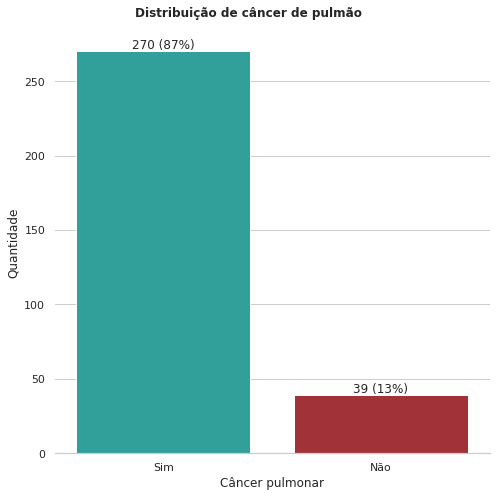

In [11]:
plt.figure(figsize=(7,7))
plt.suptitle('Distribuição de câncer de pulmão', fontweight='bold')
visualize.variable_dist_count(df, 'LUNG_CANCER')
plt.tight_layout()
plt.show()

É notável, então, que a grande maioria do conjunto se trata de indivíduos que possuem câncer de pulmão.

### 3.2 Distribuição de gênero

Podemos analisar a variável `GENDER` para verificar se há algum padrão de distribuição de gênero entre os pacientes e a existência de câncer de pulmão.

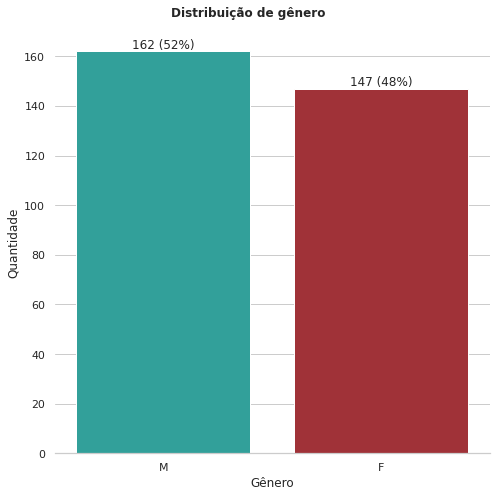

In [12]:
plt.figure(figsize=(7,7))
plt.suptitle('Distribuição de gênero', fontweight='bold')
visualize.variable_dist_count(df, 'GENDER')
plt.tight_layout()
plt.show()

Como podemos analisar, a maioria dos pacientes são do sexo masculino, com uma diferença de aprox. 4% em relação ao sexo feminino.

Podemos fazer uma análise mais detalhada analisando os genêros em relação a presença de câncer de pulmão.


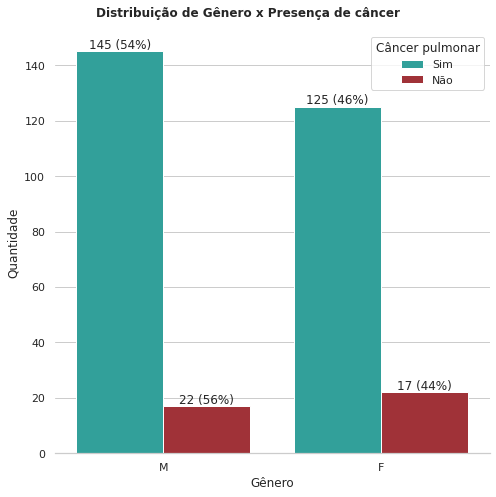

In [13]:
plt.figure(figsize=(7,7))
ax = visualize.variable_dist_count(df, 'GENDER', compare='LUNG_CANCER')
plt.suptitle('Distribuição de Gênero x Presença de câncer', fontweight='bold')
plt.tight_layout()
plt.show()

Os dados se mantém consistentes quando analisamos a presença de câncer de pulmão. **Não é viável alegar**, portanto, que o gênero influencia na presença de câncer de pulmão.

### 3.3 Distribuição de idade

Podemos também analisar a variável `AGE` para verificar se há algum padrão de distribuição de idade entre os pacientes e a existência de câncer de pulmão.

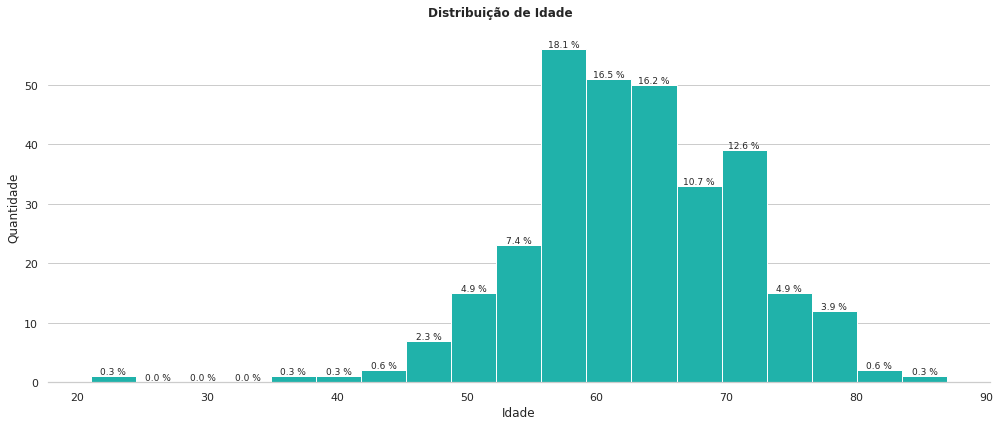

In [14]:
plt.figure(figsize=(14,6))
#visualize.variable_dist_count(df, 'GENDER', axe=axes.flatten()[0])
ax = visualize.variable_dist_histogram(df, 'AGE')
plt.suptitle('Distribuição de Idade', fontweight='bold')
plt.tight_layout()
plt.show()

Podemos verificar que a maioria dos pacientes se encontra na faixa etária acima de 40 anos. A distribuição de idade dos pacientes é bem uniforme, com uma leve tendência de pacientes mais velhos.

Podemos analisar a distribuição de idade dos pacientes em relação a presença de câncer de pulmão.

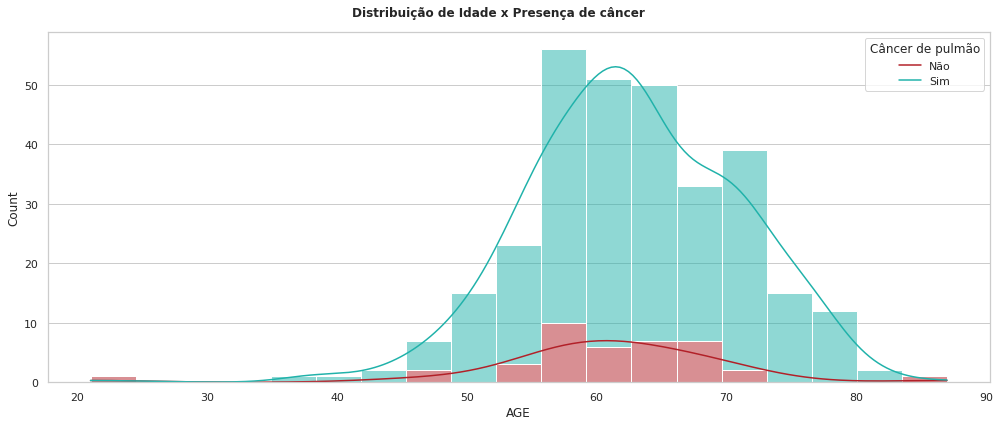

In [15]:
plt.figure(figsize=(14,6))
ax = sns.histplot(data=df, x='AGE', hue='LUNG_CANCER', multiple='stack', kde=True)
ax.xaxis.grid(False)
plt.legend(title='Câncer de pulmão', loc='upper right', labels=['Não', 'Sim'])
plt.suptitle('Distribuição de Idade x Presença de câncer ', fontweight='bold')
plt.tight_layout()
plt.show()

Podemos verificar alguns dados adicionais, como média, variância e desvio padrão das idades

In [16]:
#DADOS ADICIONAIS
#Get mean, variance and default deviation of ages on a table
age_data = df.groupby('LUNG_CANCER')['AGE'].agg(['mean', 'var', 'std'])
#Rename columns to better visualize
age_data.rename(columns={'mean': 'Média', 'var': 'Variância', 'std': 'Desvio Padrão'}, inplace=True)
#Rename index column to better visualize
age_data.index.names=['Câncer pulmonar']
#Format values to 2 decimal places
age_data = age_data.round(1)
#Display table
age_data


,Média,Variância,Desvio Padrão
Câncer pulmonar,,,
Não,60.7,92.7,9.6
Sim,63.0,63.5,8.0


Os dados se mantém consistentes quando analisamos a presença de câncer de pulmão. 

Contudo é possível notar que a maioria dos casos positivos está na faixa de 60 a 70 anos. Então **é possível considerar**, que a idade pode influenciar na presença de câncer de pulmão.

### 3.4 Análise de sintomas

Analisamos agora a presença de sintomas entre os pacientes e a correlação destes com a existência de câncer de pulmão. Buscando encontrar um padrão que nos ajude a, posteriormente, criar um modelo de aprendizagem de máquina para predição de câncer de pulmão.

#### 3.4.1 Correlação entre os sintomas

Podemos analisar a correlação entre os sintomas dos pacientes antes de realizar outras análises para tentar encontrar um padrão entre o aparecimento de sintomas nos pacientes. 

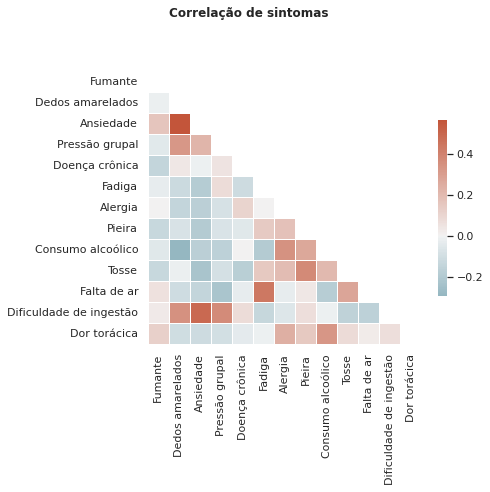

In [17]:
query_data = df.replace(["Não", "Sim"], [0, 1])
var_group = 'Sintoma'
ax = visualize.correlation(query_data[columns_by_group[var_group]], df_dict=df_dict)

plt.suptitle("Correlação de sintomas", fontweight='bold')
plt.tight_layout()
plt.show()

Podemos concluir que: 
- Ansiedade `(ANXIETY)` e Dedos amarelados `(YELLOW_FINGERS)` são os sintomas mais correlacionados
- Dedos amarelados `(YELLOW_FINGERS)` e Consumo alcoólico `(ALCOHOL CONSUMING)` são os sintomas menos correlacionados
- Outras correlações notáveis:
    - Ansiedade `(ANXIETY)` e Dificuldade de ingestão `(SWALLOWING DIFFICULTY)`
    - Fadiga `(FATIGUE)` e Falta de ar `(SHORTNESS OF BREATH)`

Ao analisarmos outros gráficos podemos ficar atentos à essas variáveis para buscar padrões.

#### 3.4.2 Ocorrência de sintomas

**Primeiramente**, vamos analisar a distribuição de todos os sintomas entre o conjunto de dados inteiro, em seguida vamos verificar a distribuição em pacientes que possuem um caso confirmado.

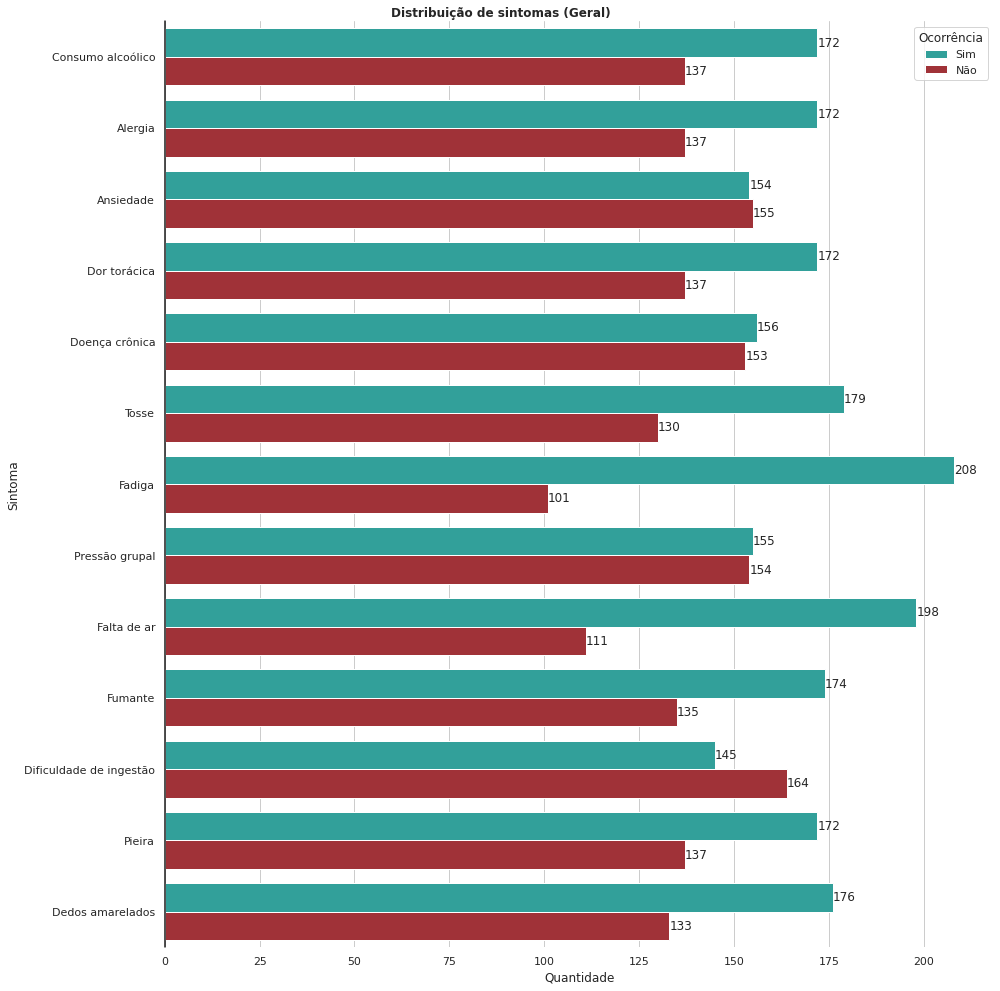

In [18]:
fig = plt.figure(figsize=(14,14))
ax = visualize.dist_sintomas(df, df_dict)

fig.suptitle("Distribuição de sintomas (Geral)", fontweight='bold')
fig.tight_layout()

ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)

fig.show()


**Com isso, podemos chegar em algumas conclusões:**
- Fadiga `(FATIGUE)` é o sintoma mais comum, segudio de Falta de ar `(SHORTNESS OF BREATH)` e Tosse `(COUGH)`
- Dificuldade de ingestão `(SWALLOWING DIFFICULTY)` é o sintoma menos comum

Agora, vamos checar a aparição de sintomas em casos positivos de câncer de pulmão.

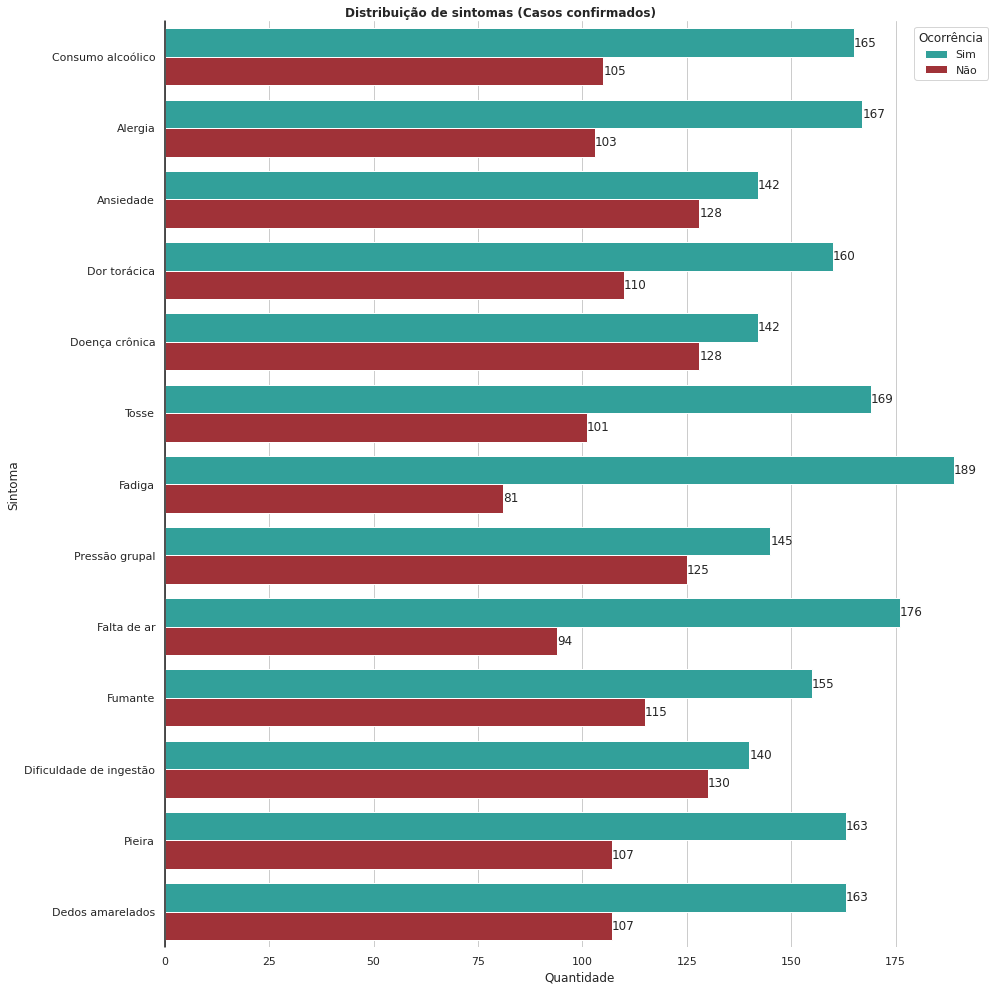

In [19]:
df2 = df.drop(df[df['LUNG_CANCER'] == 'Não'].index)
fig = plt.figure(figsize=(14,14))
ax = visualize.dist_sintomas(df2, df_dict)
fig.suptitle("Distribuição de sintomas (Casos confirmados)", fontweight='bold')
ax.set(frame_on=False)
ax.axvline(0, color="k", clip_on=False)
fig.tight_layout()
plt.show()


**Comparando os dois gráficos podemos concluir:**
- Fadiga `(FATIGUE)` também é o sintoma mais comum quando consideramos apenas os casos positivos de câncer pulmonar
- Dificuldade de ingestão `(SWALLOWING DIFFICULTY)` é o sintoma menos comum entre os casos positivos de câncer pulmonar
- Pressão grupal `(PEER_PRESSURE)`, Doença crônica `(CHRONIC DISEASE)` e Ansiedade `(ANXIETY)` são sintomas que aparecem de forma relativamente igual entre os casos positivos e negativos 
- No geral, os dados permanecem consistentes, o que é esperado considerando que a maioria do conjunto de dados é de pacientes com câncer de pulmão

Além disso, ao comparar os gráficos acima com a correlação feita anteriormente, podemos notar que: 

- Fadiga `(FATIGUE)` e Falta de ar `(SHORTNESS OF BREATH)` são sintomas correlacionados que aparecem com muita frequência nos casos positivos de câncer de pulmão
- Ansiedade `(ANXIETY)` aparece de forma similar em casos positivos e negativos, mas é fortemente correlacionado com Dedos amarelados `(YELLOW_FINGERS)` que possui uma ocorrência maior em casos positivos. 


#### 3.4.3 Dados estatísticos sobre sintomas

Podemos também brevemente analisar dados como:
- Média que um paciente com câncer de pulmão possui
- Buscar casos fora do padrão, como por exemplo, pacientes que possuem muitos sintomas e não possuem câncer de pulmão

In [20]:
df3 = df.copy()
#Binarize data
df3.replace(["Não", "Sim"], [0, 1], inplace=True)
#Add field to dataframe with the count of symptoms
df3['Sintomas'] = df3[columns_by_group['Sintoma']].sum(axis=1)


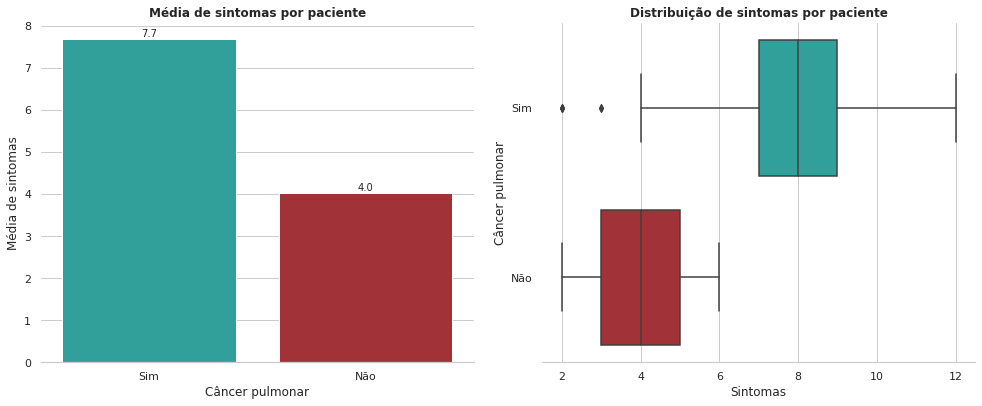

In [21]:
#Subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6))

#Plot 1
visualize.sintomas_statistics(df3, axe=axes[0])
visualize.boxplot_sintomas(df3, y='LUNG_CANCER', axe=axes[1])
fig.tight_layout(pad=2)
fig.show()

Podemos visualizar então, que pacientes com câncer de pulmão possuem em média 7.7 sintomas, enquanto que aqueles que não possuem a doença tem uma média de 4 sintomas.

Ao análisar nosso gráfico de caixa, notamos a existência de valores que parecem estar fora do padrão, vamos tentar encotra-los e realizar uma análise mais aprofundada.


In [22]:
symptons_data = df3.groupby('LUNG_CANCER')['Sintomas'].agg(['mean', 'median', 'min', 'max'])
#Rename columns
symptons_data.rename(columns={'mean': 'Média', 'median': 'Mediana', 'min': 'Mínimo', 'max': 'Máximo'}, inplace=True)
#Rename index column
symptons_data.index.names=['Câncer pulmonar']
#Rename values of index colum to {0: 'Não', 1: 'Sim'}
symptons_data.index = symptons_data.index.map({0: 'Não', 1: 'Sim'})
#Order by index
symptons_data = symptons_data.reindex(['Sim', 'Não'])
#Format values to 2 decimal places
symptons_data = symptons_data.round(1)
#Display table
symptons_data


,Média,Mediana,Mínimo,Máximo
Câncer pulmonar,,,,
Sim,7.7,8.0,2,12
Não,4.0,4.0,2,6


In [23]:
#Get all people that have 2 symptoms
df4 = df3.copy()
df4 = df4[df4['Sintomas'] == 2]
#Get only those that have lung cancer
df4 = df4[df4['LUNG_CANCER'] == 1]
#Go back to {0: 'Não', 1: 'Sim'} values in all variables
df4.replace([0, 1], ["Não", "Sim"], inplace=True)
df4

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Sintomas
187,M,55,Sim,Não,Não,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Sim,2
190,F,69,Não,Não,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Sim,2
193,F,64,Não,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Sim,2


Notamos então que há 3 pacientes com 2 sintomas que possuem câncer de pulmão. O que pode ser um indicativo de que esses pacientes podem ter descoberto a doença em estágio inicial, ou que a doença pode estar causando nestes indivíduos outros sintomas que não foram registrados.

No geral, concluimos que **há casos fora do padrão**, e que **nem sempre a ausência de sintomas significa que o paciente não possui câncer de pulmão.**

Além disso, também podemos concluir que **a presença dos sintomas apresentados pode influenciar na presença de câncer de pulmão**. Ademais podemos afirmar que **não há sintomas que sejam exclusivos de pacientes com câncer de pulmão**, assim como **não há como determinar apenas um (ou um grupo) de sintomas que sejam suficientes para provar que uma pessoa possui câncer de pulmão.**